In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [115]:
df = pd.read_csv('reg/다중회귀_종사자수.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    144 non-null    object 
 1   silver_hall             144 non-null    int64  
 2   year                    144 non-null    int64  
 3   stress                  144 non-null    float64
 4   melancholy              144 non-null    float64
 5   고령인구비율                  144 non-null    float64
 6   65세이상인구                 144 non-null    int64  
 7   전체인구                    144 non-null    int64  
 8   상대적빈곤율(중위소득60%이하)       144 non-null    float64
 9   생활비에 보탬이 되기위해 취업희망 노인수  144 non-null    float64
 10  welfare_facil_w         144 non-null    float64
 11  welfare_staff           144 non-null    int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 13.6+ KB


,city,silver_hall,year,stress,melancholy,고령인구비율,65세이상인구,전체인구,상대적빈곤율(중위소득60%이하),생활비에 보탬이 되기위해 취업희망 노인수,welfare_facil_w,welfare_staff
0,창원시,953,2013,14.8,3.4,9.4,101571,1083731,51394.926,37069.149020,0.003946,59
1,진주시,515,2013,26.0,11.5,13.1,44016,337071,22272.096,25661.328000,0.004881,13
2,통영시,207,2013,21.4,6.0,13.4,18685,139719,9454.610,6819.240230,0.005452,5
3,사천시,330,2013,19.7,2.7,16.9,19738,116851,9987.428,7203.541004,0.005348,1
4,김해시,532,2013,16.4,2.8,8.0,41790,522049,21145.740,15251.594820,0.005192,35
...,...,...,...,...,...,...,...,...,...,...,...,...
139,하동군,382,2020,17.2,3.1,34.6,15490,44785,7837.940,5614.948416,0.005382,7
140,산청군,342,2020,11.3,4.3,36.8,12833,34857,6493.498,4679.652096,0.005425,0
141,함양군,408,2020,17.4,5.1,33.8,13227,39080,6692.862,4830.646968,0.005382,0
142,거창군,438,2020,13.7,4.0,27.7,17026,61502,8615.156,6327.517392,0.005469,14


In [116]:
del df['year']

In [117]:
del df['city']

In [118]:
del df['전체인구']

In [119]:
df.columns

Index(['silver_hall', 'stress', 'melancholy', '고령인구비율', '65세이상인구',
       '상대적빈곤율(중위소득60%이하)', '생활비에 보탬이 되기위해 취업희망 노인수', 'welfare_facil_w',
       'welfare_staff'],
      dtype='object')

In [7]:
# 데이터셋 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaling = scaler.fit_transform(df)
df_scaling = pd.DataFrame(df_scaling, columns=['silver_hall','stress','melancholy','ratio_old','old_peo','poverty','job_needs','welfare_facil_w','welfare_staff'])

df_scaling

,silver_hall,stress,melancholy,ratio_old,old_peo,poverty,job_needs,welfare_facil_w,welfare_staff
0,3.281285,-0.603847,-0.830049,-1.490651,2.796554,2.796554,2.560474,-3.511613,2.152936
1,0.656856,1.293084,1.459850,-1.090420,0.619255,0.619255,1.456952,-0.988856,0.057572
2,-1.188633,0.513987,-0.095020,-1.057969,-0.339013,-0.339013,-0.365715,0.552825,-0.306839
3,-0.451635,0.226060,-1.027942,-0.679372,-0.299178,-0.299178,-0.328540,0.272519,-0.489045
4,0.758718,-0.332857,-0.999671,-1.642090,0.535046,0.535046,0.449979,-0.147939,1.059702
...,...,...,...,...,...,...,...,...,...
139,-0.140059,-0.197362,-0.914860,1.235248,-0.459880,-0.459880,-0.482211,0.364494,-0.215736
140,-0.379733,-1.196638,-0.575616,1.473224,-0.560394,-0.560394,-0.572686,0.481654,-0.534596
141,0.015729,-0.163488,-0.349453,1.148712,-0.545489,-0.545489,-0.558079,0.364494,-0.534596
142,0.195484,-0.790153,-0.660427,0.488871,-0.401773,-0.401773,-0.413281,0.598814,0.103123


# Random Forest

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf 
seed = 2021 
np.random.seed(seed)
tf.random.set_seed(seed)

In [9]:
# Scaled data
X_train, X_test, y_train, y_test = train_test_split(
    df_scaling.iloc[:,:-1], df_scaling.iloc[:,-1], test_size=0.3, 
    random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 8), (44, 8), (100,), (44,))

In [10]:
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

In [11]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 100]})

In [12]:
print(grid.best_score_)
print(grid.best_params_)

0.5054045282564703
{'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}


In [13]:
rf_1= RandomForestRegressor(n_estimators=10, max_depth=8, min_samples_leaf=8,
                            min_samples_split=8, random_state=seed)

In [14]:
rf_1.fit(X_train,y_train)

pred = rf_1.predict(X_test)
print(pred)

[ 1.55161318 -0.39804923 -0.44400338 -0.46421175 -0.3319576  -0.29847728
 -0.31657131 -0.36779136 -0.43563631 -0.44929678 -0.3194457  -0.31802095
  1.99166718  0.98265246 -0.46271838  0.59722737 -0.45167967  1.57527459
 -0.3319576  -0.30565013 -0.25864892 -0.49885581 -0.43531588 -0.38250998
 -0.4188575  -0.23420301 -0.4712617   1.99166718  1.99166718  1.564753
 -0.37181476 -0.25864892  1.99166718 -0.40353709 -0.3196177  -0.32326063
 -0.12117912 -0.4421606  -0.44322353  1.55161318 -0.44960915 -0.09673321
 -0.38993684 -0.48914986]


In [15]:
print(r2_score(y_test, pred))

0.7567044446853634


In [16]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10

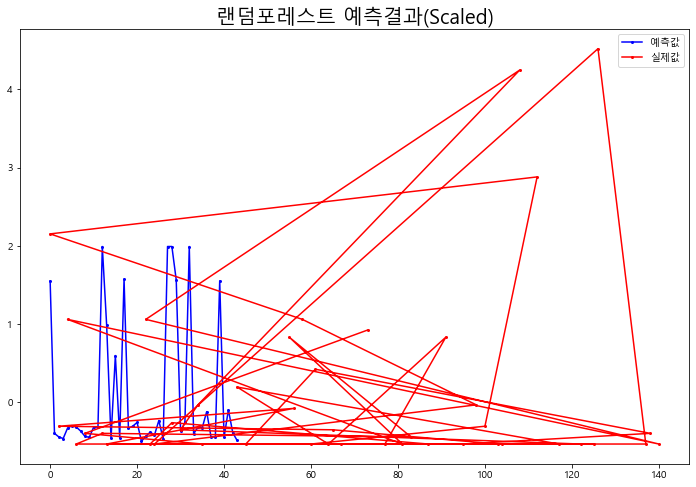

In [17]:
plt.figure(figsize=(12,8))
plt.plot(pred, 'bo-', markersize=2, label='예측값')
plt.plot(y_test, 'ro-', markersize=2, label='실제값')
plt.legend()
plt.title('랜덤포레스트 예측결과(Scaled)', size=20)
plt.show()

In [18]:
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2_points = r2_score(y_test, pred)
print("RMSE:", rmse)
print("R^2:", r2_points)

RMSE: 0.5916205221796034
R^2: 0.7567044446853634


# Decision Tree

In [37]:
# Scaled data
X_train, X_test, y_train, y_test = train_test_split(
    df_scaling.iloc[:,:-1], df_scaling.iloc[:,-1], test_size=0.3, 
    random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 8), (44, 8), (100,), (44,))

In [38]:
grid = GridSearchCV(dtr, param_grid=param_grid)

grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=4),
             param_grid={'criterion': ['mse'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 8, 10, 20]})

In [39]:
print(grid.best_score_)
print(grid.best_params_)

0.7989937653439123
{'criterion': 'mse', 'max_depth': 2}


In [40]:
dtr = DecisionTreeRegressor(criterion='mse', max_depth=2)

dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [41]:
y_pred2 = dtr.predict(X_test)
print(y_pred2)

[ 0.54621403 -0.41087632 -0.41087632 -0.41087632 -0.41087632 -0.41087632
 -0.41087632 -0.41087632 -0.41087632 -0.41087632 -0.41087632 -0.41087632
  2.91212543  0.54621403 -0.41087632  0.54621403 -0.41087632  0.54621403
 -0.41087632 -0.41087632 -0.41087632 -0.41087632 -0.41087632 -0.41087632
 -0.41087632 -0.41087632 -0.41087632  2.91212543  2.91212543  0.54621403
 -0.41087632 -0.41087632  2.91212543 -0.41087632 -0.41087632 -0.41087632
  0.54621403 -0.41087632 -0.41087632  0.54621403 -0.41087632  0.54621403
 -0.41087632 -0.41087632]


In [42]:
print(r2_score(y_test, y_pred2))

0.8903298012093549


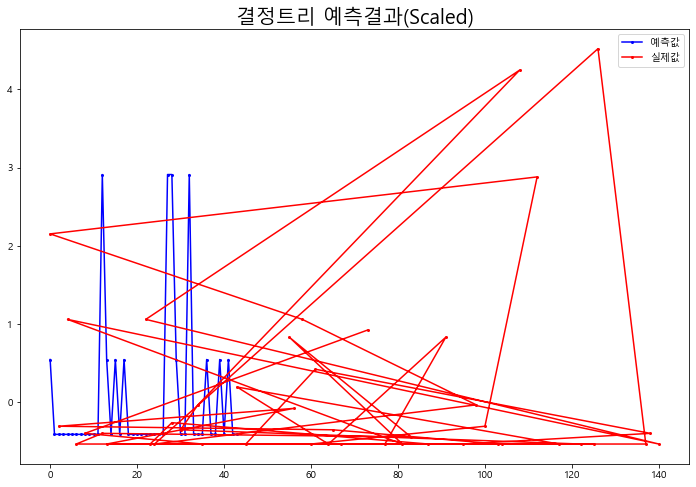

In [43]:
plt.figure(figsize=(12,8))
plt.plot(y_pred2, 'bo-', markersize=2, label='예측값')
plt.plot(y_test, 'ro-', markersize=2, label='실제값')
plt.legend()
plt.title('결정트리 예측결과(Scaled)', size=20)
plt.show()

In [44]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
r2_points = r2_score(y_test, y_pred2)
print("RMSE:", rmse)
print("R^2:", r2_points)

RMSE: 0.3972102603644783
R^2: 0.8903298012093549


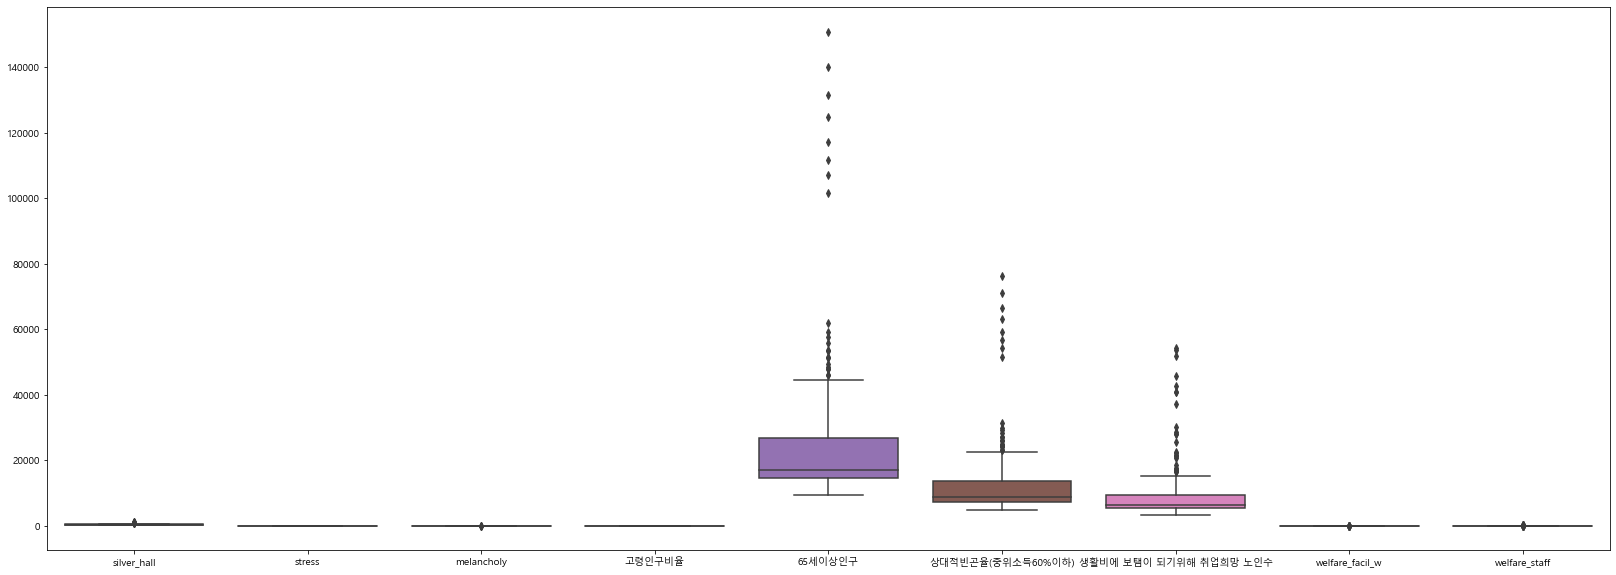

In [120]:
# 이상치 확인
plt.figure(figsize=(28, 10))
sns.boxplot(data=df)
plt.show()

In [121]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [122]:
# 함수 사용해서 이상치 값 삭제
outlier_idx_1 = get_outlier(df=df, column='65세이상인구', weight=1.5)

df.drop(outlier_idx_1, axis=0, inplace=True)

In [124]:
# 함수 사용해서 이상치 값 삭제
outlier_idx_2 = get_outlier(df=df, column='생활비에 보탬이 되기위해 취업희망 노인수', weight=1.5)

df.drop(outlier_idx_2, axis=0, inplace=True)

In [137]:
# 함수 사용해서 이상치 값 삭제
outlier_idx_2 = get_outlier(df=df, column='welfare_facil_w', weight=1.5)

df.drop(outlier_idx_2, axis=0, inplace=True)

In [138]:
df

,silver_hall,stress,melancholy,고령인구비율,65세이상인구,상대적빈곤율(중위소득60%이하),생활비에 보탬이 되기위해 취업희망 노인수,welfare_facil_w,welfare_staff
2,207,21.4,6.0,13.4,18685,9454.610,6819.240230,0.005452,5
3,330,19.7,2.7,16.9,19738,9987.428,7203.541004,0.005348,1
5,403,17.2,1.1,21.7,23527,11904.662,8586.366866,0.005400,0
7,267,14.8,7.7,10.0,27927,14131.062,10192.182070,0.005452,1
8,283,24.1,5.7,31.5,9273,4692.138,3384.255534,0.005244,3
...,...,...,...,...,...,...,...,...,...
139,382,17.2,3.1,34.6,15490,7837.940,5614.948416,0.005382,7
140,342,11.3,4.3,36.8,12833,6493.498,4679.652096,0.005425,0
141,408,17.4,5.1,33.8,13227,6692.862,4830.646968,0.005382,0
142,438,13.7,4.0,27.7,17026,8615.156,6327.517392,0.005469,14


# 이상치 제거후

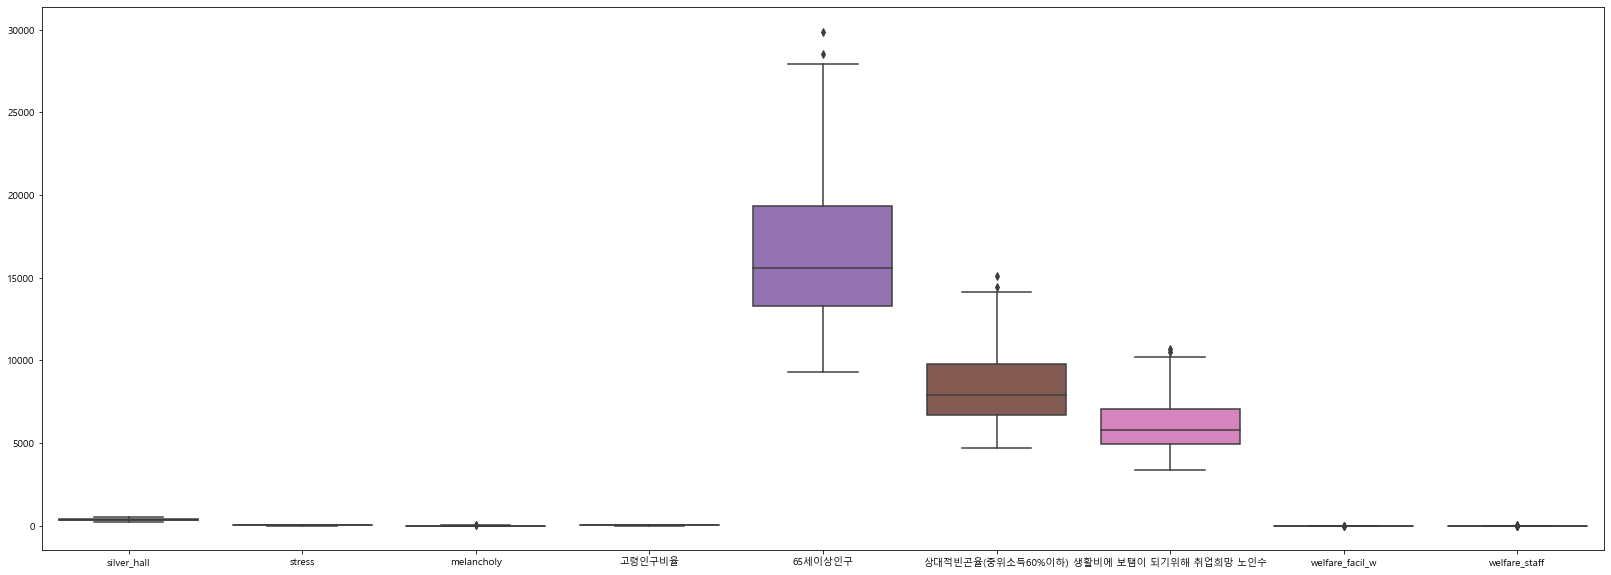

In [140]:
# 이상치 확인
plt.figure(figsize=(28, 10))
sns.boxplot(data=df)
plt.show()

In [142]:
# 데이터셋 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaling = scaler.fit_transform(df)
df_scaling = pd.DataFrame(df_scaling, columns=['silver_hall','stress','melancholy','ratio_old','old_peo','poverty','job_needs','welfare_facil_w','welfare_staff'])

df_scaling

,silver_hall,stress,melancholy,ratio_old,old_peo,poverty,job_needs,welfare_facil_w,welfare_staff
0,-2.115033,0.432459,-0.121007,-2.045317,0.412087,0.412087,0.383290,0.307735,0.495012
1,-0.451504,0.150027,-0.982291,-1.514255,0.629057,0.629057,0.597301,-0.935886,-0.364745
2,0.535794,-0.265315,-1.399884,-0.785941,1.409776,1.409776,1.367373,-0.314075,-0.579685
3,-1.303555,-0.664044,0.322685,-2.561206,2.316392,2.316392,2.261624,0.307735,-0.364745
4,-1.087161,0.881029,-0.199305,0.701033,-1.527245,-1.527245,-1.529594,-2.179506,0.065133
...,...,...,...,...,...,...,...,...,...
94,0.251777,-0.265315,-0.877893,1.171402,-0.246239,-0.246239,-0.287359,-0.527824,0.924890
95,-0.289208,-1.245523,-0.564699,1.505213,-0.793711,-0.793711,-0.808210,-0.008026,-0.579685
96,0.603417,-0.232088,-0.355903,1.050016,-0.712528,-0.712528,-0.724123,-0.527824,-0.579685
97,1.009156,-0.846794,-0.642997,0.124451,0.070252,0.070252,0.109458,0.511772,2.429465


In [143]:
# Scaled data
X_train, X_test, y_train, y_test = train_test_split(
    df_scaling.iloc[:,:-1], df_scaling.iloc[:,-1], test_size=0.3, 
    random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((69, 8), (30, 8), (69,), (30,))

In [144]:
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

In [145]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 100]})

In [146]:
print(grid.best_score_)
print(grid.best_params_)

-0.024232403145380443
{'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 10}


In [147]:
rf= RandomForestRegressor(n_estimators=10, max_depth=10, min_samples_leaf=8,
                            min_samples_split=16, random_state=seed)

In [148]:
rf.fit(X_train,y_train)

pred = rf.predict(X_test)
print(pred)

[-0.46130884 -0.24015596 -0.2635162   0.44697136  0.36116064 -0.24526941
 -0.20258738 -0.54635738  0.40334666  0.36116064  0.20284775  0.5390615
 -0.48858911  0.37692285  0.44697136 -0.42514933 -0.35802123 -0.18437411
 -0.23087728  0.38364389 -0.44936777 -0.50720153  0.40334666  0.28683327
 -0.37077796 -0.08588281 -0.40194953  0.25833805 -0.55829845  0.23047555]


In [149]:
print(r2_score(y_test, pred))

-0.0670684366275891


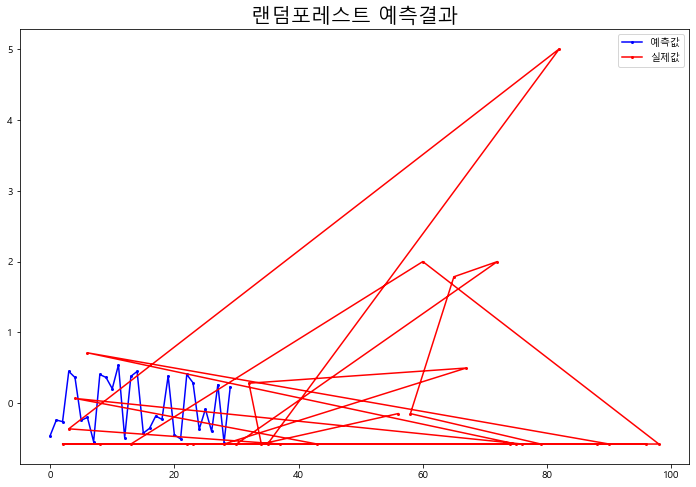

In [150]:
plt.figure(figsize=(12,8))
plt.plot(pred, 'bo-', markersize=2, label='예측값')
plt.plot(y_test, 'ro-', markersize=2, label='실제값')
plt.legend()
plt.title('랜덤포레스트 예측결과', size=20)
plt.show()

In [151]:
dtr = DecisionTreeRegressor()
param_grid = {'criterion':['mse'], 'max_depth':[None,2,3,4,5,6,8,10,20]}

grid = GridSearchCV(dtr, param_grid=param_grid)

grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 8, 10, 20]})

In [152]:
print(grid.best_score_)
print(grid.best_params_)

0.24007995100192506
{'criterion': 'mse', 'max_depth': 3}


In [153]:
dtr = DecisionTreeRegressor(criterion='mse', max_depth=3)

dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [154]:
y_pred2 = dtr.predict(X_test)
print(y_pred2)

[-0.57968464 -0.35451019 -0.35451019  0.06513311  2.48319964 -0.35451019
 -0.35451019 -0.57968464  0.76368566  2.48319964 -0.57968464  0.76368566
 -0.35451019  2.48319964  0.78159726 -0.14980614 -0.35451019 -0.35451019
 -0.35451019 -0.57968464 -0.57968464 -0.57968464  0.76368566 -0.57968464
 -0.14980614 -0.35451019 -0.57968464 -0.35451019 -0.57968464 -0.35451019]


In [155]:
print(r2_score(y_test, y_pred2))

-0.15218298369305305


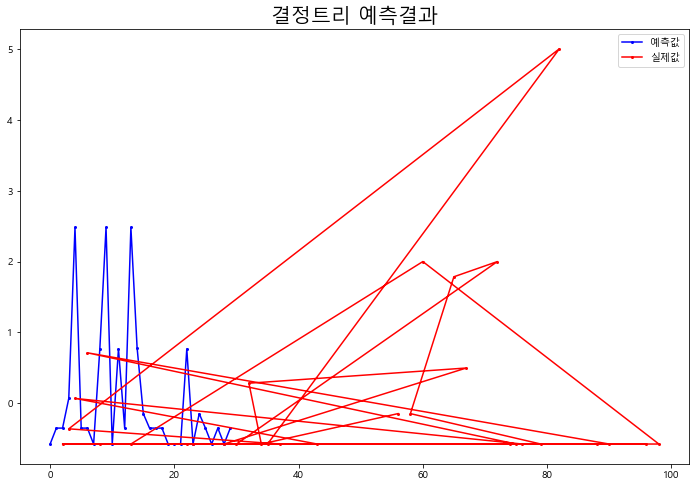

In [156]:
plt.figure(figsize=(12,8))
plt.plot(y_pred2, 'bo-', markersize=2, label='예측값')
plt.plot(y_test, 'ro-', markersize=2, label='실제값')
plt.legend()
plt.title('결정트리 예측결과', size=20)
plt.show()